In [1]:
import numpy as np
from matplotlib import pyplot as plt
from time import time
from lib import Loss, Distance, KNN

In [2]:
data = np.loadtxt("mnist/MNIST-5-6-Subset.txt")
data_light_corruption = np.loadtxt("mnist/MNIST-5-6-Subset-Light-Corruption.txt")
data_moderate_corruption = np.loadtxt("mnist/MNIST-5-6-Subset-Moderate-Corruption.txt")
data_heavy_corruption = np.loadtxt("mnist/MNIST-5-6-Subset-Heavy-Corruption.txt")
labels = np.loadtxt("mnist/MNIST-5-6-Subset-Labels.txt")

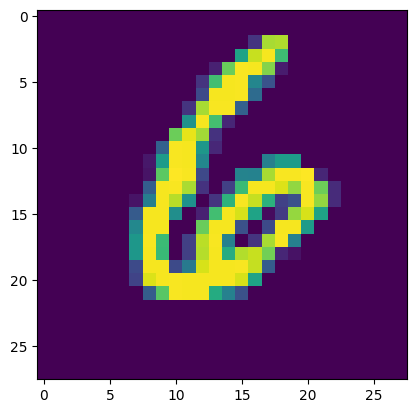

In [3]:
grayscale_image =  data.reshape(-1, 28, 28)[2].T
plt.imshow(grayscale_image, interpolation='nearest')
plt.show()

In [8]:
x = data.reshape(1877, 784)
y = labels.astype(int)
train_size = 100
ns = [10, 20, 40, 80]
iss = np.arange(1, 5 + 1)
ks = np.arange(1, 50 + 1)
x_train = x[:train_size]

errors = []

for n in ns:
    n_errors = []
    for i in iss:
        i_errors = []
        for k in ks:
            f = 100 + i * n + 1
            t = 100 + (i + 1) * n
            x_validation = x[f:t]
            truths = y[f:t]
            predictions = KNN.knn(x_train, x_validation, y, k)
            validation_loss = 1 - np.average(Loss.binary(truths, predictions))

            i_errors.append(validation_loss)
        n_errors.append(i_errors)
    errors.append(n_errors)

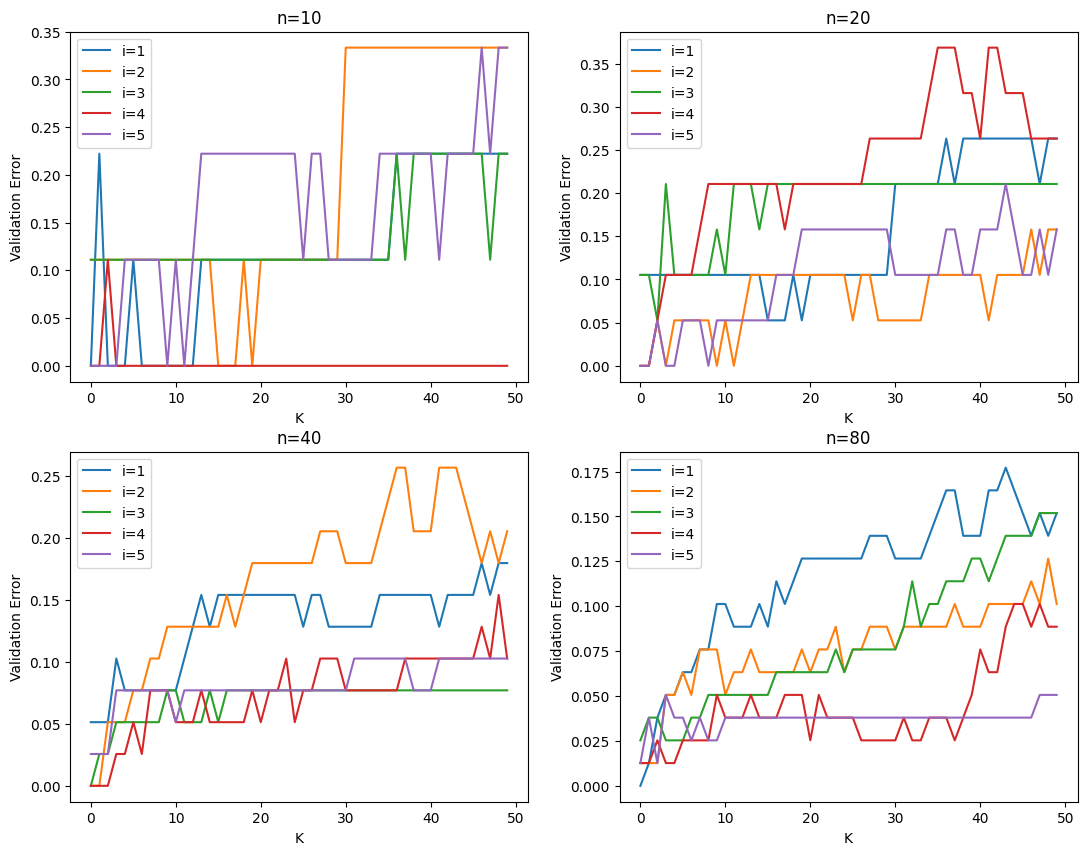

In [9]:
figure, axes = plt.subplots(2, 2,  figsize=(13, 10))
x = 0
axes = np.ravel(axes)
for ni, n in enumerate(errors):
    for ii, i in enumerate(n):
        axes[ni].plot(i, label=f"i={iss[ii]}")
        axes[ni].set_title(f"n={ns[ni]}")
        axes[ni].set_xlabel("K")
        axes[ni].set_ylabel("Validation Error")
        axes[ni].legend()

plt.legend()
# figure.tight_layout()
plt.savefig("knn.png")
plt.show()

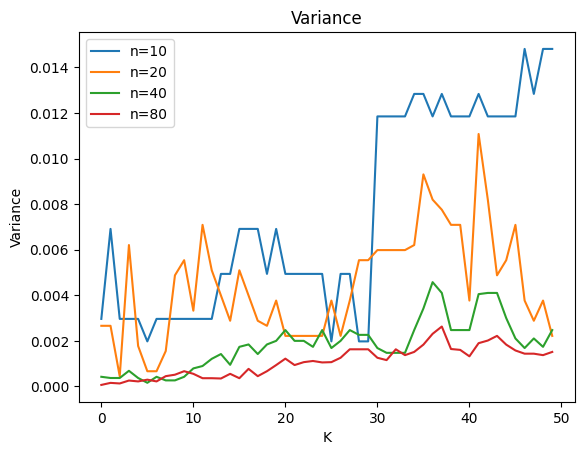

In [10]:
for ni, n in enumerate(errors):
    n = np.asarray(n)
    plt.plot(np.var(n, axis=0), label=f"n={ns[ni]}")
    plt.title("Variance")
    plt.xlabel("K")
    plt.ylabel("Variance")
    plt.legend()

plt.legend()
plt.savefig("knn_variance.png")
plt.show()

In [ ]:
n = 80
corruption_errors = []
for x in [data, data_light_corruption, data_moderate_corruption, data_heavy_corruption]:
    x = x.reshape(1877, 784)
    n_errors = []
    for i in iss:
        i_errors = []
        for k in ks:
            f = 100 + i * n + 1
            t = 100 + (i + 1) * n
            x_validation = x[f:t]
            truths = y[f:t]
            predictions = KNN.knn(x_train, x_validation, y, k)
            validation_loss = 1 - np.average(Loss.binary(truths, predictions))

            i_errors.append(validation_loss)
        n_errors.append(i_errors)
    corruption_errors.append(n_errors)

In [ ]:
figure, axes = plt.subplots(2, 2,  figsize=(13, 10))
x = 0
axes = np.ravel(axes)
for ni, n in enumerate(errors):
    for ii, i in enumerate(n):
        axes[ni].plot(i, label=f"i={iss[ii]}")
        axes[ni].set_title(f"n={ns[ni]}")
        axes[ni].set_xlabel("K")
        axes[ni].set_ylabel("Validation Error")
        axes[ni].legend()

plt.legend()
# figure.tight_layout()
plt.savefig("knn.png")
plt.show()